# Log Analyser / Analisador de Logs

## Importando Dependências

In [2]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Importando Dados

In [3]:
def merge_logs(filename_template="HouseKeepingLog.txt"):
  """
  Lê todos os arquivos txt em uma pasta e mescla seu conteúdo em memória.
  """

  # Encontra todos os arquivos HouseKeepingLog.txt* na pasta atual
  files = glob.glob(f'{filename_template}*')

  # Inicializa uma lista para armazenar o conteúdo dos arquivos
  merged_data = []

  # Loop pelos arquivos encontrados
  for file in files:
    print(f'Lendo o arquivo {file}')
    with open(file, 'r') as f:
      # Lê o conteúdo do arquivo e adiciona à lista
      data = f.readlines()
      merged_data.extend(data)

  # Retorna o conteúdo mesclado
  return merged_data

In [4]:
# Merge logs into one variable
merged_logs = merge_logs('HouseKeepingLog.txt')

Lendo o arquivo HouseKeepingLog.txt
Lendo o arquivo HouseKeepingLog.txt.10
Lendo o arquivo HouseKeepingLog.txt.6
Lendo o arquivo HouseKeepingLog.txt.12
Lendo o arquivo HouseKeepingLog.txt.1
Lendo o arquivo HouseKeepingLog.txt.13
Lendo o arquivo HouseKeepingLog.txt.3
Lendo o arquivo HouseKeepingLog.txt.2
Lendo o arquivo HouseKeepingLog.txt.5
Lendo o arquivo HouseKeepingLog.txt.8
Lendo o arquivo HouseKeepingLog.txt.14
Lendo o arquivo HouseKeepingLog.txt.11
Lendo o arquivo HouseKeepingLog.txt.9
Lendo o arquivo HouseKeepingLog.txt.4
Lendo o arquivo HouseKeepingLog.txt.7


In [5]:
# Cria um DataFrame a partir da lista de logs
df = pd.DataFrame(merged_logs, columns=['log_line'])

# Extrai as informações de cada linha
df[['datetime', 'pid', 'status', 'program', 'message']] = df['log_line'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \[(\d+)\] (\w+)  (\w+) - (.*)')

# Converte a coluna 'data_hora' para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S,%f')

# Ordena o DataFrame pela coluna 'datetime'
df = df.sort_values(by=['datetime'])

df.head()

log_line  \
93878  2022-09-08 10:53:38,133 [4268] INFO  HouseKeep...   
93887  2022-09-08 10:53:38,133 [4268] INFO  HouseKeep...   
93886  2022-09-08 10:53:38,133 [4268] INFO  HouseKeep...   
93885  2022-09-08 10:53:38,133 [4268] INFO  HouseKeep...   
93884  2022-09-08 10:53:38,133 [4268] INFO  HouseKeep...   

                     datetime   pid status          program  \
93878 2022-09-08 10:53:38.133  4268   INFO  HouseKeepingLog   
93887 2022-09-08 10:53:38.133  4268   INFO  HouseKeepingLog   
93886 2022-09-08 10:53:38.133  4268   INFO  HouseKeepingLog   
93885 2022-09-08 10:53:38.133  4268   INFO  HouseKeepingLog   
93884 2022-09-08 10:53:38.133  4268   INFO  HouseKeepingLog   

                                                 message  
93878               Environment - Machine Name: DG0Q9NQ3  
93887     Environment - Total Free Memory (Mbytes): 6724  
93886  Environment - Total Physical Memory (Mbytes): ...  
93885                         Environment - CPU Count: 4  
93884        Environment - .Net Version: 4.0.30319.42000

In [6]:
print(f"Registro mais antigo: {df['datetime'].min()}")
print(f"Registro mais recente: {df['datetime'].max()}")

Registro mais antigo: 2022-09-08 10:53:38.133000
Registro mais recente: 2024-09-06 13:25:42.869000


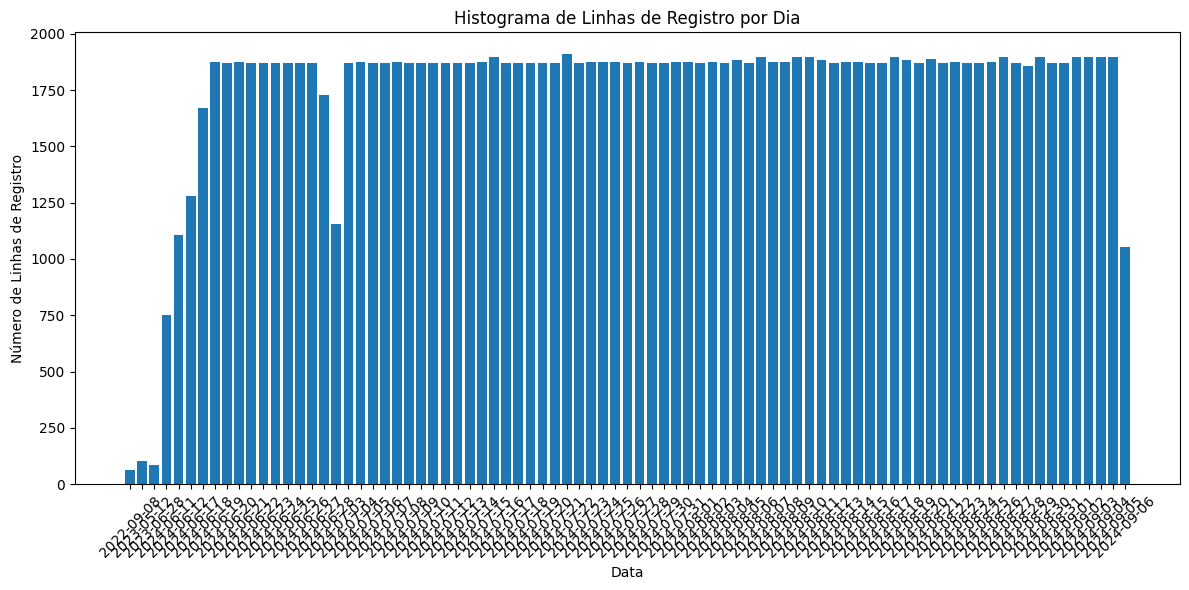

In [7]:
# Gerar um histograma de linhas de registro por dia

import matplotlib.pyplot as plt
# Agrupa as linhas de registro por dia
daily_counts = df.groupby(df['datetime'].dt.date)['log_line'].count()

# Cria o histograma
plt.figure(figsize=(12, 6))
plt.bar(daily_counts.index.astype(str), daily_counts.values)
plt.xlabel("Data")
plt.ylabel("Número de Linhas de Registro")
plt.title("Histograma de Linhas de Registro por Dia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Filtrar os dados para ter apenas os meses de julho e agosto de 2024
df = df[(df['datetime'].dt.month.isin([7, 8])) & (df['datetime'].dt.year == 2024)]
df.head()

log_line  \
23531  2024-07-03 09:22:02,958 [4840] INFO  HouseKeep...   
23533  2024-07-03 09:22:02,958 [4840] INFO  HouseKeep...   
23532  2024-07-03 09:22:02,958 [4840] INFO  HouseKeep...   
23530  2024-07-03 09:22:02,958 [4840] INFO  HouseKeep...   
23524  2024-07-03 09:22:02,958 [4840] INFO  HouseKeep...   

                     datetime   pid status          program  \
23531 2024-07-03 09:22:02.958  4840   INFO  HouseKeepingLog   
23533 2024-07-03 09:22:02.958  4840   INFO  HouseKeepingLog   
23532 2024-07-03 09:22:02.958  4840   INFO  HouseKeepingLog   
23530 2024-07-03 09:22:02.958  4840   INFO  HouseKeepingLog   
23524 2024-07-03 09:22:02.958  4840   INFO  HouseKeepingLog   

                                                 message  
23531  Environment - Total Physical Memory (Mbytes): ...  
23533                      Environment - No Logged User.  
23532     Environment - Total Free Memory (Mbytes): 6810  
23530                         Environment - CPU Count: 4  
23524  Environment - OS Version: Microsoft Windows NT...

In [9]:
# Salva o DataFrame em um arquivo CSV
df.to_csv('housekeeping_logs_processados.csv', index=False)

## Extração dos Dados

In [10]:
# Filtrar as linhas que contenham "FDA CPU Load: x.xx%"
df_fda_cpu = df[df['message'].str.contains("FDA CPU Load: \d+\.\d+%")].copy()

# Extrair o valor da CPU da mensagem e botar na coluna value
df_fda_cpu['value'] = df_fda_cpu['message'].str.extract(r'FDA CPU Load: (\d+\.\d+)%')

# Exibir as primeiras linhas do DataFrame filtrado
df_fda_cpu.head()

log_line  \
23534  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23548  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23561  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23574  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23587  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23534 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23548 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23561 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23574 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23587 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                   message value  
23534  FDA CPU Load: 3.79%  3.79  
23548  FDA CPU Load: 3.03%  3.03  
23561  FDA CPU Load: 3.79%  3.79  
23574  FDA CPU Load: 3.79%  3.79  
23587  FDA CPU Load: 5.30%  5.30

In [11]:
# Filtrar as linhas que contenham "Total CPU Load: x.xx%"
df_total_cpu = df[df['message'].str.contains("Total CPU Load: \d+\.\d+%")].copy()

# Extrair o valor da CPU da mensagem e botar na coluna value
df_total_cpu['value'] = df_total_cpu['message'].str.extract(r'Total CPU Load: (\d+\.\d+)%')

# Exibir as primeiras linhas do DataFrame filtrado
df_total_cpu.head()

log_line  \
23535  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23549  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23562  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23575  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23588  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23535 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23549 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23562 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23575 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23588 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                     message value  
23535  Total CPU Load: 9.83%  9.83  
23549  Total CPU Load: 3.01%  3.01  
23562  Total CPU Load: 3.77%  3.77  
23575  Total CPU Load: 3.77%  3.77  
23588  Total CPU Load: 5.28%  5.28

In [12]:
# Filtrar as linhas que contenham "FDA Memory Usage: xxxKB"
df_fda_memory = df[df['message'].str.contains("FDA Memory Usage: \d+KB")].copy()

# Extrair o valor da memória da mensagem e botar na coluna value
df_fda_memory['value'] = df_fda_memory['message'].str.extract(r'FDA Memory Usage: (\d+)KB')

# Exibir as primeiras linhas do DataFrame filtrado
df_fda_memory.head()

log_line  \
23536  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23550  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23563  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23576  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23589  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23536 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23550 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23563 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23576 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23589 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                       message value  
23536   FDA Memory Usage: 93KB    93  
23550   FDA Memory Usage: 92KB    92  
23563   FDA Memory Usage: 92KB    92  
23576   FDA Memory Usage: 92KB    92  
23589  FDA Memory Usage: 120KB   120

In [13]:
# Filtrar as linhas que contenham "Total Memory free: xxxMB"
df_total_memory = df[df['message'].str.contains("Total Memory free: \d+MB")].copy()

# Extrair o valor da memória da mensagem e botar na coluna value
df_total_memory['value'] = df_total_memory['message'].str.extract(r'Total Memory free: (\d+)MB')

# Exibir as primeiras linhas do DataFrame filtrado
df_total_memory.head()

log_line  \
23537  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23551  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23564  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23577  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23590  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23537 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23551 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23564 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23577 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23590 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                         message value  
23537  Total Memory free: 6732MB  6732  
23551  Total Memory free: 6059MB  6059  
23564  Total Memory free: 5831MB  5831  
23577  Total Memory free: 5736MB  5736  
23590  Total Memory free: 5752MB  5752

In [14]:
# Filtrar as linhas que contenham "Available free space in drive C:\ is: xx.xxGB"
df_c_disk_space = df[df['message'].str.contains(r"Available free space in drive C:\\ is: \d+\.\d+GB")].copy()

# Extrair o valor do espaço livre em disco da mensagem e botar na coluna value
df_c_disk_space['value'] = df_c_disk_space['message'].str.extract(r'Available free space in drive C:\\ is: (\d+\.\d+)GB')

# Exibir as primeiras linhas do DataFrame filtradoa
df_c_disk_space.head()

log_line  \
23539  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23553  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23566  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23579  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23592  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23539 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23553 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23566 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23579 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23592 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                                             message  value  
23539  Available free space in drive C:\ is: 41.15GB  41.15  
23553  Available free space in drive C:\ is: 41.12GB  41.12  
23566  Available free space in drive C:\ is: 41.22GB  41.22  
23579  Available free space in drive C:\ is: 41.22GB  41.22  
23592  Available free space in drive C:\ is: 41.22GB  41.22

In [15]:
# Filtrar as linhas que contenham "Available free space in drive D:\ is: xx.xxGB"
df_d_disk_space = df[df['message'].str.contains(r"Available free space in drive D:\\ is: \d+\.\d+GB")].copy()

# Extrair o valor do espaço livre em disco da mensagem e botar na coluna value
df_d_disk_space['value'] = df_d_disk_space['message'].str.extract(r'Available free space in drive D:\\ is: (\d+\.\d+)GB')

# Exibir as primeiras linhas do DataFrame filtradoa
df_d_disk_space.head()

log_line  \
23540  2024-07-03 09:22:20,173 [4208] INFO  HouseKeep...   
23554  2024-07-03 09:32:16,488 [6108] INFO  HouseKeep...   
23567  2024-07-03 09:42:16,489 [6260] INFO  HouseKeep...   
23580  2024-07-03 09:52:16,501 [2244] INFO  HouseKeep...   
23593  2024-07-03 10:02:16,515 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23540 2024-07-03 09:22:20.173  4208   INFO  HouseKeepingLog   
23554 2024-07-03 09:32:16.488  6108   INFO  HouseKeepingLog   
23567 2024-07-03 09:42:16.489  6260   INFO  HouseKeepingLog   
23580 2024-07-03 09:52:16.501  2244   INFO  HouseKeepingLog   
23593 2024-07-03 10:02:16.515  6544   INFO  HouseKeepingLog   

                                              message   value  
23540  Available free space in drive D:\ is: 357.67GB  357.67  
23554  Available free space in drive D:\ is: 357.66GB  357.66  
23567  Available free space in drive D:\ is: 357.66GB  357.66  
23580  Available free space in drive D:\ is: 357.66GB  357.66  
23593  Available free space in drive D:\ is: 357.66GB  357.66

In [16]:
# Filtrar as linhas que contenham "Network Embedded NIC 1 is UP at 1000Mbps, with receive load of x.xx% and send load of x.xx%"
df_network_load = df[df['message'].str.contains(r"Network Embedded NIC 1 is UP at 1000Mbps, with receive load of \d+\.\d+% and send load of \d+\.\d+%")].copy()

# Extrair o valor do receive load e send load da mensagem e botar nas colunas value_receive e value_send
df_network_load[['value_receive', 'value_send']] = df_network_load['message'].str.extract(r'receive load of (\d+\.\d+)% and send load of (\d+\.\d+)%')

# Exibir as primeiras linhas do DataFrame filtrado
df_network_load.head()

log_line  \
23543  2024-07-03 09:22:20,298 [4208] INFO  HouseKeep...   
23557  2024-07-03 09:32:16,613 [6108] INFO  HouseKeep...   
23570  2024-07-03 09:42:16,614 [6260] INFO  HouseKeep...   
23583  2024-07-03 09:52:16,626 [2244] INFO  HouseKeep...   
23596  2024-07-03 10:02:16,640 [6544] INFO  HouseKeep...   

                     datetime   pid status          program  \
23543 2024-07-03 09:22:20.298  4208   INFO  HouseKeepingLog   
23557 2024-07-03 09:32:16.613  6108   INFO  HouseKeepingLog   
23570 2024-07-03 09:42:16.614  6260   INFO  HouseKeepingLog   
23583 2024-07-03 09:52:16.626  2244   INFO  HouseKeepingLog   
23596 2024-07-03 10:02:16.640  6544   INFO  HouseKeepingLog   

                                                 message value_receive  \
23543  Network Embedded NIC 1 is UP at 1000Mbps, with...          0.43   
23557  Network Embedded NIC 1 is UP at 1000Mbps, with...          0.50   
23570  Network Embedded NIC 1 is UP at 1000Mbps, with...          0.47   
23583  Network Embedded NIC 1 is UP at 1000Mbps, with...          0.50   
23596  Network Embedded NIC 1 is UP at 1000Mbps, with...          0.47   

      value_send  
23543       0.01  
23557       0.02  
23570       0.01  
23583       0.02  
23596       0.01

In [17]:
# Filtrar as linhas que contenham "Computer up time: 0 days 00:00:"
df_computer_restart = df[df['message'].str.contains("Computer up time: 0 days 00:0")].copy()
df_computer_restart.head()

log_line  \
23545  2024-07-03 09:22:20,298 [4208] INFO  HouseKeep...   
53787  2024-08-21 19:20:37,906 [3372] INFO  HouseKeep...   

                     datetime   pid status          program  \
23545 2024-07-03 09:22:20.298  4208   INFO  HouseKeepingLog   
53787 2024-08-21 19:20:37.906  3372   INFO  HouseKeepingLog   

                                 message  
23545  Computer up time: 0 days 00:00:30  
53787  Computer up time: 0 days 00:00:30

## Visualização dos Dados

### Usando Matplotlib

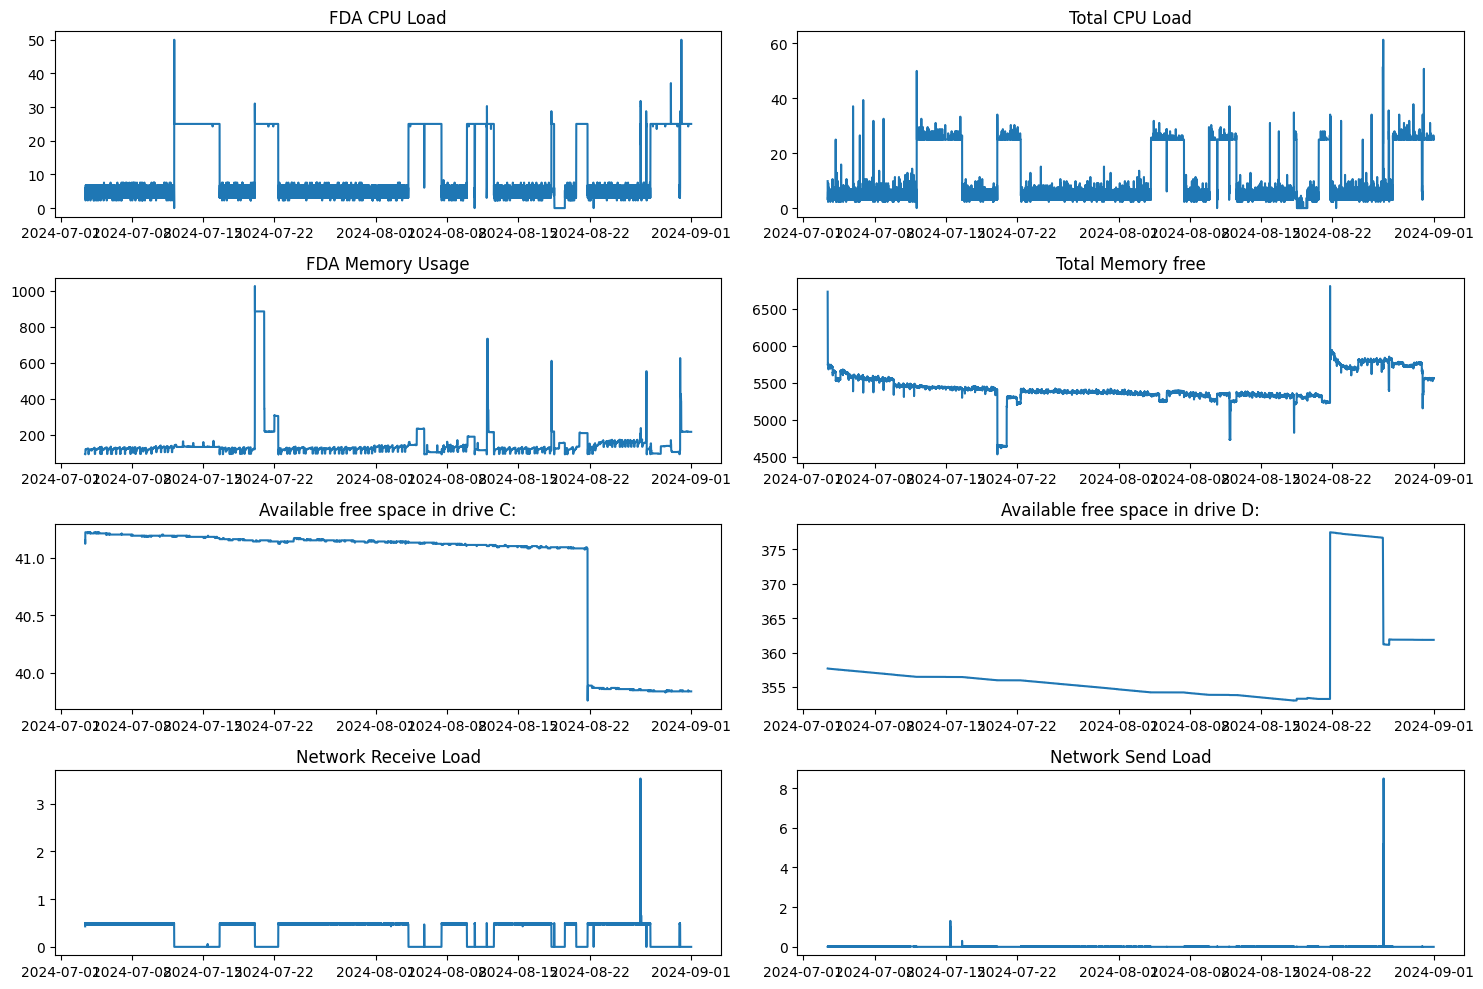

In [18]:
# Cria uma figura com vários subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 10))

# Plota os dados de CPU
axs[0, 0].plot(df_fda_cpu['datetime'], df_fda_cpu['value'].astype(float))
axs[0, 0].set_title('FDA CPU Load')
axs[0, 1].plot(df_total_cpu['datetime'], df_total_cpu['value'].astype(float))
axs[0, 1].set_title('Total CPU Load')

# Plota os dados de memória
axs[1, 0].plot(df_fda_memory['datetime'], df_fda_memory['value'].astype(float))
axs[1, 0].set_title('FDA Memory Usage')
axs[1, 1].plot(df_total_memory['datetime'], df_total_memory['value'].astype(float))
axs[1, 1].set_title('Total Memory free')

# Plota os dados de espaço em disco
axs[2, 0].plot(df_c_disk_space['datetime'], df_c_disk_space['value'].astype(float))
axs[2, 0].set_title('Available free space in drive C:')
axs[2, 1].plot(df_d_disk_space['datetime'], df_d_disk_space['value'].astype(float))
axs[2, 1].set_title('Available free space in drive D:')

# Plota os dados de rede
axs[3, 0].plot(df_network_load['datetime'], df_network_load['value_receive'].astype(float))
axs[3, 0].set_title('Network Receive Load')
axs[3, 1].plot(df_network_load['datetime'], df_network_load['value_send'].astype(float))
axs[3, 1].set_title('Network Send Load')

# Ajusta o layout dos subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Usando Plotly

In [19]:
# Cria um subplot com 3 linhas e 2 colunas
fig = make_subplots(rows=4, cols=2, subplot_titles=("FDA CPU Load", "Total CPU Load",
                                                    "FDA Memory Usage", "Total Memory free",
                                                    "Available free space in drive C:", "Available free space in drive D:",
                                                    "Network Receive Load", "Network Send Load"))

# Adiciona os traces para cada gráfico
fig.add_trace(go.Scatter(x=df_fda_cpu['datetime'], y=df_fda_cpu['value'].astype(float)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_total_cpu['datetime'], y=df_total_cpu['value'].astype(float)), row=1, col=2)
fig.add_trace(go.Scatter(x=df_fda_memory['datetime'], y=df_fda_memory['value'].astype(float)), row=2, col=1)
fig.add_trace(go.Scatter(x=df_total_memory['datetime'], y=df_total_memory['value'].astype(float)), row=2, col=2)
fig.add_trace(go.Scatter(x=df_c_disk_space['datetime'], y=df_c_disk_space['value'].astype(float)), row=3, col=1)
fig.add_trace(go.Scatter(x=df_d_disk_space['datetime'], y=df_d_disk_space['value'].astype(float)), row=3, col=2)
fig.add_trace(go.Scatter(x=df_d_disk_space['datetime'], y=df_network_load['value_receive'].astype(float)), row=4, col=1)
fig.add_trace(go.Scatter(x=df_d_disk_space['datetime'], y=df_network_load['value_send'].astype(float)), row=4, col=2)

# Configura o layout do gráfico
fig.update_layout(height=800, width=1200, title_text="HouseKeeping Log Analysis")

# Exibe o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/

In [20]:
# Cria uma figura com vários subplots
fig = go.Figure()

# Adiciona os traces para cada gráfico
fig.add_trace(go.Scatter(x=df_fda_cpu['datetime'], y=df_fda_cpu['value'].astype(float), name='FDA CPU Load'))
fig.add_trace(go.Scatter(x=df_fda_memory['datetime'], y=df_fda_memory['value'].astype(float), name='FDA Memory Usage'))
# fig.add_trace(go.Scatter(x=df_total_cpu['datetime'], y=df_total_cpu['value'].astype(float), name='Total CPU Load'))
# fig.add_trace(go.Scatter(x=df_total_memory['datetime'], y=df_total_memory['value'].astype(float), name='Total Memory Free'))
# fig.add_trace(go.Scatter(x=df_c_disk_space['datetime'], y=df_c_disk_space['value'].astype(float), name='Available free space in drive C:'))
# fig.add_trace(go.Scatter(x=df_d_disk_space['datetime'], y=df_d_disk_space['value'].astype(float), name='Available free space in drive D:'))

# Configura o layout do gráfico
fig.update_layout(height=800, width=1200, title_text="HouseKeeping Log Analysis")

# Exibe o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Detecção de Anomalias

## Método Suavização Exponencial

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

dataframe = df_fda_cpu.reset_index().dropna()
x = dataframe['datetime']
y = dataframe['value'].astype(float)
modelo = SimpleExpSmoothing(y)
model_fit = modelo.fit(smoothing_level=0.2, optimized=False)

y_pred = model_fit.predict(0,len(y)-1)

anomalies = np.where(np.abs(y - y_pred) > 2.5 * np.std(y))[0]
print(f'Foram detectados {len(anomalies)} pontos de anomalias.')

Foram detectados 6 pontos de anomalias.


### Usando Matplotlib

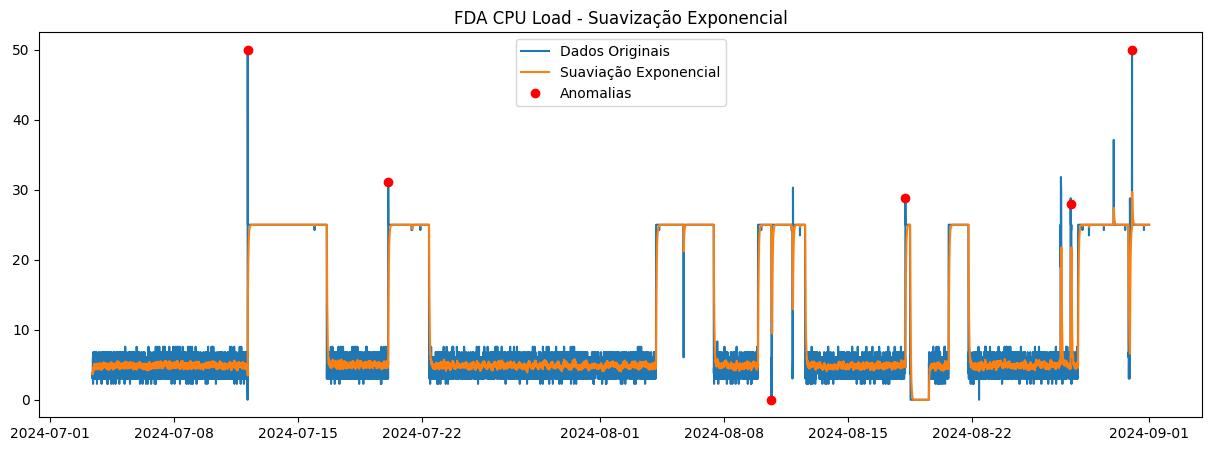

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="Dados Originais")
plt.plot(x, y_pred, label="Suaviação Exponencial")
plt.plot(x[anomalies], y[anomalies], 'ro', label='Anomalias')
plt.title('FDA CPU Load - Suavização Exponencial')
plt.legend()
plt.show()

### Usando Plotly

In [23]:
# Cria um gráfico com plotly
fig = go.Figure()

# Adiciona os traces para os dados originais, a previsão e as anomalias
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name="Dados Originais"))
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name="Suaviação Exponencial"))
fig.add_trace(go.Scatter(x=x[anomalies], y=y[anomalies], mode='markers', name='Anomalias'))

# Configura o layout do gráfico
fig.update_layout(title="FDA CPU Load - Suavização Exponencial",
                  xaxis_title="Data",
                  yaxis_title="CPU Load (%)")

# Exibe o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Eventos

Os eventos foram confirmados no dias:

*   12/07 - 04h
*   20/07 - 02h
*   04/08 - 05h
*   18/08 - 06h



In [24]:
# Cria um novo DataFrame para o receive load
df_network_load_receive = df_network_load[['datetime', 'value_receive']].copy()
df_network_load_receive.rename(columns={'value_receive': 'value'}, inplace=True)
df_network_load_receive['type'] = 'network_load'

# Cria um novo DataFrame para o send load
df_network_load_send = df_network_load[['datetime', 'value_send']].copy()
df_network_load_send.rename(columns={'value_send': 'value'}, inplace=True)
df_network_load_send['type'] = 'network_send'

# Concatena os DataFrames
df_network_load = pd.concat([df_network_load_receive, df_network_load_send], ignore_index=True)


In [25]:
# Criar uma lista para armazenar os DataFrames
dataframes = []

# Adicionar os DataFrames à lista com a coluna 'type' e 'event'
dataframes.append(df_fda_cpu.assign(type='fda_cpu', event=False))
dataframes.append(df_total_cpu.assign(type='total_cpu', event=False))
dataframes.append(df_fda_memory.assign(type='fda_memory', event=False))
dataframes.append(df_total_memory.assign(type='total_memory', event=False))
dataframes.append(df_c_disk_space.assign(type='c_disk_space', event=False))
dataframes.append(df_d_disk_space.assign(type='d_disk_space', event=False))
dataframes.append(df_network_load.assign(event=False))
dataframes.append(df_computer_restart.assign(type='computer_restart', event=False))

# Concatenar os DataFrames
df_unificado = pd.concat(dataframes)

# Converter a coluna 'value' para numérico
df_unificado['value'] = pd.to_numeric(df_unificado['value'], errors='coerce')

# Marcar os eventos
df_unificado.loc[
    (df_unificado['datetime'].dt.day == 12) & (df_unificado['datetime'].dt.hour == 4) & (df_unificado['datetime'].dt.month == 7),
    'event'
] = True
df_unificado.loc[
    (df_unificado['datetime'].dt.day == 20) & (df_unificado['datetime'].dt.hour == 2) & (df_unificado['datetime'].dt.month == 7),
    'event'
] = True
df_unificado.loc[
    (df_unificado['datetime'].dt.day == 4) & (df_unificado['datetime'].dt.hour == 5) & (df_unificado['datetime'].dt.month == 8),
    'event'
] = True
df_unificado.loc[
    (df_unificado['datetime'].dt.day == 18) & (df_unificado['datetime'].dt.hour == 6) & (df_unificado['datetime'].dt.month == 8),
    'event'
] = True

# Ordenar o DataFrame por data e hora
df_unificado = df_unificado.sort_values(by=['datetime'])

# remover as colunas log_line, pid, status e program
df_unificado = df_unificado.drop(columns=['log_line', 'pid', 'status', 'program'])

# Caso o tipo seja computer_restart, então o valor deve ser 1
df_unificado.loc[df_unificado['type'] == "computer_restart", 'value'] = 1

# Exibir o DataFrame unificado
df_unificado.head(10)


datetime                                         message  \
23534 2024-07-03 09:22:20.173                             FDA CPU Load: 3.79%   
23540 2024-07-03 09:22:20.173  Available free space in drive D:\ is: 357.67GB   
23537 2024-07-03 09:22:20.173                       Total Memory free: 6732MB   
23536 2024-07-03 09:22:20.173                          FDA Memory Usage: 93KB   
23535 2024-07-03 09:22:20.173                           Total CPU Load: 9.83%   
23539 2024-07-03 09:22:20.173   Available free space in drive C:\ is: 41.15GB   
23545 2024-07-03 09:22:20.298               Computer up time: 0 days 00:00:30   
0     2024-07-03 09:22:20.298                                             NaN   
8590  2024-07-03 09:22:20.298                                             NaN   
23551 2024-07-03 09:32:16.488                       Total Memory free: 6059MB   

         value              type  event  
23534     3.79           fda_cpu  False  
23540   357.67      d_disk_space  False  
23537  6732.00      total_memory  False  
23536    93.00        fda_memory  False  
23535     9.83         total_cpu  False  
23539    41.15      c_disk_space  False  
23545     1.00  computer_restart  False  
0         0.43      network_load  False  
8590      0.01      network_send  False  
23551  6059.00      total_memory  False

In [26]:
# Criar uma matriz de correlação entre os tipos e o event == True
correlation_matrix = df_unificado.pivot_table(index='type', columns='event', values='value', aggfunc='mean')

# Exibir a matriz de correlação
print(correlation_matrix)

event                   False        True 
type                                      
c_disk_space        40.922358    41.136250
computer_restart     1.000000          NaN
d_disk_space       357.646877   354.912500
fda_cpu             10.854165    25.072500
fda_memory         147.912445   405.916667
network_load         0.325957     0.000000
network_send         0.011406     0.000000
total_cpu           11.132754    25.422500
total_memory      5439.589890  5105.666667


# Dados do Interrogador

## Importando Dados

In [27]:
interrogator_merged_logs = merge_logs('InterrogatorLog.txt')

Lendo o arquivo InterrogatorLog.txt.1
Lendo o arquivo InterrogatorLog.txt.3
Lendo o arquivo InterrogatorLog.txt
Lendo o arquivo InterrogatorLog.txt.4
Lendo o arquivo InterrogatorLog.txt.2


## Extraindo Dados

In [28]:
# Cria um DataFrame a partir da lista de logs
df = pd.DataFrame(interrogator_merged_logs, columns=['log_line'])

# Extrai as informações de cada linha
df[['datetime', 'pid', 'status', 'program', 'message']] = df['log_line'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \[(\d+)\] (\w+)  (\w+) - (.*)')
df[['unit', 'module', 'type', 'log']] = df['message'].str.extract(r'\[(\w+-\d+)\] (\w+)::(\w+) - (.*)')
df.dropna(inplace=True)

# Converte a coluna 'data_hora' para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S,%f')

# Ordena o DataFrame pela coluna 'datetime'
df = df.sort_values(by=['datetime'])

df.head()

log_line  \
18568  2022-09-08 10:54:44,392 [2812] INFO  Interroga...   
18569  2022-09-08 10:54:45,427 [2812] INFO  Interroga...   
18570  2022-09-08 10:54:46,431 [2812] INFO  Interroga...   
18574  2022-09-08 10:55:49,466 [8680] INFO  Interroga...   
18575  2022-09-08 10:55:50,497 [8680] INFO  Interroga...   

                     datetime   pid status          program  \
18568 2022-09-08 10:54:44.392  2812   INFO  InterrogatorLog   
18569 2022-09-08 10:54:45.427  2812   INFO  InterrogatorLog   
18570 2022-09-08 10:54:46.431  2812   INFO  InterrogatorLog   
18574 2022-09-08 10:55:49.466  8680   INFO  InterrogatorLog   
18575 2022-09-08 10:55:50.497  8680   INFO  InterrogatorLog   

                                                 message            unit  \
18568  [Interrogator-1] InterrogatorModule::OnCommand...  Interrogator-1   
18569  [Interrogator-2] InterrogatorModule::OnCommand...  Interrogator-2   
18570  [Interrogator-3] InterrogatorModule::OnCommand...  Interrogator-3   
18574  [Interrogator-1] InterrogatorModule::OnCommand...  Interrogator-1   
18575  [Interrogator-2] InterrogatorModule::OnCommand...  Interrogator-2   

                   module            type                           log  
18568  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3  
18569  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3  
18570  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3  
18574  InterrogatorModule  OnCommandRetry  Interrogator retrying 2 of 3  
18575  InterrogatorModule  OnCommandRetry  Interrogator retrying 2 of 3

In [29]:
# Filtrar as linhas que contenham "Timeout"
df_timeout = pd.DataFrame(interrogator_merged_logs, columns=['log_line'])
df_timeout[['datetime', 'pid', 'status', 'program', 'message']] = df_timeout['log_line'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \[(\d+)\] (\w+)  (\w+) - (.*)')
df_timeout = df_timeout[df_timeout['message'].str.contains("Timeout")]

# Extrair o valor do timeout da mensagem e botar na coluna value
df_timeout.loc[:, 'value'] = df_timeout['message'].str.extract(r'Timeout (\d+) after \(ms\)')

# Selecionar apenas as colunas datetime e value
# df_timeout = df_timeout[['datetime', 'value']]

# Converter a coluna 'datetime' para o tipo datetime
df_timeout['datetime'] = pd.to_datetime(df_timeout['datetime'], format='%Y-%m-%d %H:%M:%S,%f')

# Filtrar os dados para ter apenas os meses de julho e agosto
df_timeout = df_timeout[df_timeout['datetime'].dt.month.isin([7, 8])]

# Exibir as primeiras linhas do DataFrame filtrado
df_timeout.head()


<ipython-input-29-fb34e9700adf>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-fb34e9700adf>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



log_line  \
9428   2024-07-18 17:38:41,076 [2912] INFO  Interroga...   
14676  2024-08-27 23:34:48,833 [816] INFO  Interrogat...   
14682  2024-08-27 23:54:48,865 [816] INFO  Interrogat...   
14705  2024-08-28 01:29:49,108 [816] INFO  Interrogat...   
14708  2024-08-28 01:34:49,115 [816] INFO  Interrogat...   

                     datetime   pid status          program  \
9428  2024-07-18 17:38:41.076  2912   INFO  InterrogatorLog   
14676 2024-08-27 23:34:48.833   816   INFO  InterrogatorLog   
14682 2024-08-27 23:54:48.865   816   INFO  InterrogatorLog   
14705 2024-08-28 01:29:49.108   816   INFO  InterrogatorLog   
14708 2024-08-28 01:34:49.115   816   INFO  InterrogatorLog   

                                                 message value  
9428   [Interrogator-1] Interrogator.WaitInterrogator...  5000  
14676  [Interrogator-1] Interrogator.WaitInterrogator...  5000  
14682  [Interrogator-1] Interrogator.WaitInterrogator...  5000  
14705  [Interrogator-1] Interrogator.WaitInterrogator...  5000  
14708  [Interrogator-1] Interrogator.WaitInterrogator...  5000

In [30]:
# Transformar 'value' em inteiro e dividir por 1000
df_timeout['value'] = df_timeout['value'].astype(int) / 1000

## Analizando Dados

In [31]:
print('Valores de timeout, em segundos')
df_timeout['value'].unique()

Valores de timeout, em segundos


array([ 5., 20.])

In [32]:
df_timeout.query('value == 20')

log_line  \
15579  2024-08-31 00:00:20,014 [4992] INFO  Interroga...   

                     datetime   pid status          program  \
15579 2024-08-31 00:00:20.014  4992   INFO  InterrogatorLog   

                                                 message  value  
15579  [Interrogator-1] Interrogator.WaitInterrogator...   20.0

In [33]:
print(df['status'].describe())
print('')
print(df['module'].describe())

count     26646
unique        1
top        INFO
freq      26646
Name: status, dtype: object

count                  26646
unique                     1
top       InterrogatorModule
freq                   26646
Name: module, dtype: object


In [34]:
print('Unidades do Interrogador:')
print(df['unit'].unique())

print('\nTipo de Eventos')
print(df['type'].unique())

Unidades do Interrogador:
['Interrogator-1' 'Interrogator-2' 'Interrogator-3']

Tipo de Eventos
['OnCommandRetry' 'Stop' 'ExecuteInterrogatorCommand']


In [35]:
# Extrair o número da coluna unit que tem o formato Interrogator-x
df['unit_id'] = df['unit'].str.extract(r'Interrogator-(\d+)')

In [36]:
# Calcula a diferença entre a data e hora atual e a data e hora anterior
df['diff'] = df['datetime'].diff().dt.total_seconds().fillna(0)
df.head()

log_line  \
18568  2022-09-08 10:54:44,392 [2812] INFO  Interroga...   
18569  2022-09-08 10:54:45,427 [2812] INFO  Interroga...   
18570  2022-09-08 10:54:46,431 [2812] INFO  Interroga...   
18574  2022-09-08 10:55:49,466 [8680] INFO  Interroga...   
18575  2022-09-08 10:55:50,497 [8680] INFO  Interroga...   

                     datetime   pid status          program  \
18568 2022-09-08 10:54:44.392  2812   INFO  InterrogatorLog   
18569 2022-09-08 10:54:45.427  2812   INFO  InterrogatorLog   
18570 2022-09-08 10:54:46.431  2812   INFO  InterrogatorLog   
18574 2022-09-08 10:55:49.466  8680   INFO  InterrogatorLog   
18575 2022-09-08 10:55:50.497  8680   INFO  InterrogatorLog   

                                                 message            unit  \
18568  [Interrogator-1] InterrogatorModule::OnCommand...  Interrogator-1   
18569  [Interrogator-2] InterrogatorModule::OnCommand...  Interrogator-2   
18570  [Interrogator-3] InterrogatorModule::OnCommand...  Interrogator-3   
18574  [Interrogator-1] InterrogatorModule::OnCommand...  Interrogator-1   
18575  [Interrogator-2] InterrogatorModule::OnCommand...  Interrogator-2   

                   module            type                           log  \
18568  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3   
18569  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3   
18570  InterrogatorModule  OnCommandRetry  Interrogator retrying 1 of 3   
18574  InterrogatorModule  OnCommandRetry  Interrogator retrying 2 of 3   
18575  InterrogatorModule  OnCommandRetry  Interrogator retrying 2 of 3   

      unit_id    diff  
18568       1   0.000  
18569       2   1.035  
18570       3   1.004  
18574       1  63.035  
18575       2   1.031

In [37]:
# Filtrar os eventos do tipo 'Stop'
df_stop = df[df['type'] == 'Stop']
df_stop

log_line  \
18587  2022-09-08 10:57:59,487 [1644] INFO  Interroga...   
18589  2022-09-08 10:58:00,518 [8652] INFO  Interroga...   
18591  2022-09-08 10:58:01,518 [5992] INFO  Interroga...   
18593  2022-09-08 10:58:04,533 [1644] INFO  Interroga...   
18595  2022-09-08 10:58:05,564 [8652] INFO  Interroga...   
...                                                  ...   
18100  2024-09-04 08:13:48,640 [5240] INFO  Interroga...   
18152  2024-09-04 11:12:04,859 [7008] INFO  Interroga...   
18154  2024-09-04 11:12:09,952 [7008] INFO  Interroga...   
18547  2024-09-05 18:14:26,296 [5208] INFO  Interroga...   
18549  2024-09-05 18:14:31,390 [5208] INFO  Interroga...   

                     datetime   pid status          program  \
18587 2022-09-08 10:57:59.487  1644   INFO  InterrogatorLog   
18589 2022-09-08 10:58:00.518  8652   INFO  InterrogatorLog   
18591 2022-09-08 10:58:01.518  5992   INFO  InterrogatorLog   
18593 2022-09-08 10:58:04.533  1644   INFO  InterrogatorLog   
18595 2022-09-08 10:58:05.564  8652   INFO  InterrogatorLog   
...                       ...   ...    ...              ...   
18100 2024-09-04 08:13:48.640  5240   INFO  InterrogatorLog   
18152 2024-09-04 11:12:04.859  7008   INFO  InterrogatorLog   
18154 2024-09-04 11:12:09.952  7008   INFO  InterrogatorLog   
18547 2024-09-05 18:14:26.296  5208   INFO  InterrogatorLog   
18549 2024-09-05 18:14:31.390  5208   INFO  InterrogatorLog   

                                                 message            unit  \
18587  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18589  [Interrogator-2] InterrogatorModule::Stop - In...  Interrogator-2   
18591  [Interrogator-3] InterrogatorModule::Stop - In...  Interrogator-3   
18593  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18595  [Interrogator-2] InterrogatorModule::Stop - In...  Interrogator-2   
...                                                  ...             ...   
18100  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18152  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18154  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18547  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18549  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   

                   module  type                                 log unit_id  \
18587  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18589  InterrogatorModule  Stop       Interrogator waiting to stop.       2   
18591  InterrogatorModule  Stop       Interrogator waiting to stop.       3   
18593  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18595  InterrogatorModule  Stop  Interrogator stopped successfully.       2   
...                   ...   ...                                 ...     ...   
18100  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18152  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18154  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18547  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18549  InterrogatorModule  Stop  Interrogator stopped successfully.       1   

         diff  
18587   0.000  
18589   0.000  
18591   0.000  
18593   3.015  
18595   1.031  
...       ...  
18100   5.094  
18152   0.000  
18154   5.093  
18547  82.328  
18549   5.094  

[80 rows x 12 columns]

In [38]:
df_stop['log'].unique()

array(['Interrogator waiting to stop.',
       'Interrogator stopped successfully.'], dtype=object)

In [39]:
# Agrupar os eventos caso os eventos aconteçam com uma diferença menor que 6 (olhar coluna diff)
df.loc[:, 'group'] = (df['diff'] > 6).cumsum()


In [40]:
df_stop.loc[:, 'group'] = (df_stop['diff'] > 6).cumsum()

df_stop

<ipython-input-40-51b76acad084>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



log_line  \
18587  2022-09-08 10:57:59,487 [1644] INFO  Interroga...   
18589  2022-09-08 10:58:00,518 [8652] INFO  Interroga...   
18591  2022-09-08 10:58:01,518 [5992] INFO  Interroga...   
18593  2022-09-08 10:58:04,533 [1644] INFO  Interroga...   
18595  2022-09-08 10:58:05,564 [8652] INFO  Interroga...   
...                                                  ...   
18100  2024-09-04 08:13:48,640 [5240] INFO  Interroga...   
18152  2024-09-04 11:12:04,859 [7008] INFO  Interroga...   
18154  2024-09-04 11:12:09,952 [7008] INFO  Interroga...   
18547  2024-09-05 18:14:26,296 [5208] INFO  Interroga...   
18549  2024-09-05 18:14:31,390 [5208] INFO  Interroga...   

                     datetime   pid status          program  \
18587 2022-09-08 10:57:59.487  1644   INFO  InterrogatorLog   
18589 2022-09-08 10:58:00.518  8652   INFO  InterrogatorLog   
18591 2022-09-08 10:58:01.518  5992   INFO  InterrogatorLog   
18593 2022-09-08 10:58:04.533  1644   INFO  InterrogatorLog   
18595 2022-09-08 10:58:05.564  8652   INFO  InterrogatorLog   
...                       ...   ...    ...              ...   
18100 2024-09-04 08:13:48.640  5240   INFO  InterrogatorLog   
18152 2024-09-04 11:12:04.859  7008   INFO  InterrogatorLog   
18154 2024-09-04 11:12:09.952  7008   INFO  InterrogatorLog   
18547 2024-09-05 18:14:26.296  5208   INFO  InterrogatorLog   
18549 2024-09-05 18:14:31.390  5208   INFO  InterrogatorLog   

                                                 message            unit  \
18587  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18589  [Interrogator-2] InterrogatorModule::Stop - In...  Interrogator-2   
18591  [Interrogator-3] InterrogatorModule::Stop - In...  Interrogator-3   
18593  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18595  [Interrogator-2] InterrogatorModule::Stop - In...  Interrogator-2   
...                                                  ...             ...   
18100  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18152  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18154  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18547  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
18549  [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   

                   module  type                                 log unit_id  \
18587  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18589  InterrogatorModule  Stop       Interrogator waiting to stop.       2   
18591  InterrogatorModule  Stop       Interrogator waiting to stop.       3   
18593  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18595  InterrogatorModule  Stop  Interrogator stopped successfully.       2   
...                   ...   ...                                 ...     ...   
18100  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18152  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18154  InterrogatorModule  Stop  Interrogator stopped successfully.       1   
18547  InterrogatorModule  Stop       Interrogator waiting to stop.       1   
18549  InterrogatorModule  Stop  Interrogator stopped successfully.       1   

         diff  group  
18587   0.000      0  
18589   0.000      0  
18591   0.000      0  
18593   3.015      0  
18595   1.031      0  
...       ...    ...  
18100   5.094     26  
18152   0.000     26  
18154   5.093     26  
18547  82.328     27  
18549   5.094     27  

[80 rows x 13 columns]

In [41]:
df_stop = df_stop.groupby('group').first().reset_index()
df_stop

group                                           log_line  \
0       0  2022-09-08 10:57:59,487 [1644] INFO  Interroga...   
1       1  2022-09-08 11:04:19,678 [4564] INFO  Interroga...   
2       2  2023-05-12 20:23:58,003 [1264] INFO  Interroga...   
3       3  2023-05-12 20:28:41,279 [796] INFO  Interrogat...   
4       4  2023-06-28 09:18:00,147 [472] INFO  Interrogat...   
5       5  2024-06-17 10:07:34,336 [4088] INFO  Interroga...   
6       6  2024-06-17 11:09:13,521 [2528] INFO  Interroga...   
7       7  2024-06-17 16:03:25,904 [1552] INFO  Interroga...   
8       8  2024-06-17 16:43:44,496 [2224] INFO  Interroga...   
9       9  2024-06-18 10:36:29,377 [5656] INFO  Interroga...   
10     10  2024-06-18 11:23:08,165 [4592] INFO  Interroga...   
11     11  2024-07-16 14:42:47,605 [2432] INFO  Interroga...   
12     12  2024-07-22 09:06:04,199 [1316] INFO  Interroga...   
13     13  2024-07-22 09:17:57,965 [7148] INFO  Interroga...   
14     14  2024-08-05 17:45:53,605 [8136] INFO  Interroga...   
15     15  2024-08-07 10:33:48,418 [7880] INFO  Interroga...   
16     16  2024-08-07 10:39:03,668 [7312] INFO  Interroga...   
17     17  2024-08-11 21:05:38,027 [6956] INFO  Interroga...   
18     18  2024-08-12 14:15:00,418 [2952] INFO  Interroga...   
19     19  2024-08-18 12:17:52,996 [6884] INFO  Interroga...   
20     20  2024-08-19 13:41:22,121 [7576] INFO  Interroga...   
21     21  2024-08-21 19:14:47,106 [5904] INFO  Interroga...   
22     22  2024-08-27 14:49:19,906 [3388] INFO  Interroga...   
23     23  2024-08-30 19:54:41,969 [196] INFO  Interrogat...   
24     24  2024-09-02 18:37:10,312 [1040] INFO  Interroga...   
25     25  2024-09-03 08:48:37,328 [5092] INFO  Interroga...   
26     26  2024-09-04 08:13:43,546 [5240] INFO  Interroga...   
27     27  2024-09-05 18:14:26,296 [5208] INFO  Interroga...   

                  datetime   pid status          program  \
0  2022-09-08 10:57:59.487  1644   INFO  InterrogatorLog   
1  2022-09-08 11:04:19.678  4564   INFO  InterrogatorLog   
2  2023-05-12 20:23:58.003  1264   INFO  InterrogatorLog   
3  2023-05-12 20:28:41.279   796   INFO  InterrogatorLog   
4  2023-06-28 09:18:00.147   472   INFO  InterrogatorLog   
5  2024-06-17 10:07:34.336  4088   INFO  InterrogatorLog   
6  2024-06-17 11:09:13.521  2528   INFO  InterrogatorLog   
7  2024-06-17 16:03:25.904  1552   INFO  InterrogatorLog   
8  2024-06-17 16:43:44.496  2224   INFO  InterrogatorLog   
9  2024-06-18 10:36:29.377  5656   INFO  InterrogatorLog   
10 2024-06-18 11:23:08.165  4592   INFO  InterrogatorLog   
11 2024-07-16 14:42:47.605  2432   INFO  InterrogatorLog   
12 2024-07-22 09:06:04.199  1316   INFO  InterrogatorLog   
13 2024-07-22 09:17:57.965  7148   INFO  InterrogatorLog   
14 2024-08-05 17:45:53.605  8136   INFO  InterrogatorLog   
15 2024-08-07 10:33:48.418  7880   INFO  InterrogatorLog   
16 2024-08-07 10:39:03.668  7312   INFO  InterrogatorLog   
17 2024-08-11 21:05:38.027  6956   INFO  InterrogatorLog   
18 2024-08-12 14:15:00.418  2952   INFO  InterrogatorLog   
19 2024-08-18 12:17:52.996  6884   INFO  InterrogatorLog   
20 2024-08-19 13:41:22.121  7576   INFO  InterrogatorLog   
21 2024-08-21 19:14:47.106  5904   INFO  InterrogatorLog   
22 2024-08-27 14:49:19.906  3388   INFO  InterrogatorLog   
23 2024-08-30 19:54:41.969   196   INFO  InterrogatorLog   
24 2024-09-02 18:37:10.312  1040   INFO  InterrogatorLog   
25 2024-09-03 08:48:37.328  5092   INFO  InterrogatorLog   
26 2024-09-04 08:13:43.546  5240   INFO  InterrogatorLog   
27 2024-09-05 18:14:26.296  5208   INFO  InterrogatorLog   

                                              message            unit  \
0   [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
1   [Interrogator-3] InterrogatorModule::Stop - In...  Interrogator-3   
2   [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
3   [Interrogator-1] InterrogatorModule::Stop - In...  Interrogator-1   
4   [Interrogator-1] InterrogatorModule::

## Visualização de Dados

In [42]:
import plotly.express as px

# Filtra o DataFrame para remover as colunas a serem excluídas
exclude_columns = ['ExecuteInterrogatorCommand']
df_filtered = df[~df['type'].isin(exclude_columns)]

# Cria o histograma com Plotly Express
fig = px.histogram(df_filtered, x="type", title="Histograma de Eventos de Tipo no Interrogador (exceto ExecuteInterrogatorCommand)")
fig.show()

In [43]:
# Plotar o gráfico FDA CPU Load - Suavização Exponencial feito anteriormente como plotly e incluir os momentos onde ocorreu um evento do tipo Stop

# Cria um gráfico com plotly
fig = go.Figure()

# Adiciona os traces para os dados originais, a previsão e as anomalias
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name="Dados Originais"))
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name="Suaviação Exponencial"))
fig.add_trace(go.Scatter(x=x[anomalies], y=y[anomalies], mode='markers', name='Anomalias'))

# Adiciona os eventos do tipo Stop
df_stop_events = df_unificado[(df_unificado['type'] == 'fda_cpu') & (df_unificado['event'] == True)]
fig.add_trace(go.Scatter(x=df_stop_events['datetime'], y=df_stop_events['value'], mode='markers', name='Eventos de Stop no Interrogador', marker=dict(color='red', size=10)))

# Configura o layout do gráfico
fig.update_layout(title="FDA CPU Load - Suavização Exponencial com Eventos de Stop no Interrogador",
                  xaxis_title="Data",
                  yaxis_title="CPU Load (%)")

# Exibe o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [44]:
# Cria um gráfico com plotly
fig = go.Figure()

# Adiciona os traces para os dados originais, a previsão e as anomalias
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name="Dados Originais"))
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name="Suaviação Exponencial"))
fig.add_trace(go.Scatter(x=x[anomalies], y=y[anomalies], mode='markers', name='Anomalias'))

# Adiciona os eventos do tipo Stop
df_stop_events = df_unificado[(df_unificado['type'] == 'fda_cpu') & (df_unificado['event'] == True)]
fig.add_trace(go.Scatter(x=df_stop_events['datetime'], y=df_stop_events['value'], mode='markers', name='Eventos de Stop no Interrogador', marker=dict(color='red', size=10)))

# Adiciona os eventos de timeout com cores diferentes para cada valor
df_timeout_5 = df_timeout[df_timeout['value'] == 5]
fig.add_trace(go.Scatter(x=df_timeout_5['datetime'], y=df_timeout_5['value'], mode='markers', name='Timeout de 5s', marker=dict(color='orange', size=10)))

df_timeout_20 = df_timeout[df_timeout['value'] == 20]
fig.add_trace(go.Scatter(x=df_timeout_20['datetime'], y=df_timeout_20['value'], mode='markers', name='Timeout de 20s', marker=dict(color='green', size=10)))

# Configura o layout do gráfico
fig.update_layout(title="FDA CPU Load - Suavização Exponencial com Eventos de Stop no Interrogador e Timeouts",
                  xaxis_title="Data",
                  yaxis_title="CPU Load (%)")

# Exibe o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

